<a href="https://colab.research.google.com/github/jiin124/Kaggle/blob/main/Tabular_Playground_Series_Jan_2022/1%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle competitions download -c tabular-playground-series-jan-2022

  0% 0.00/306k [00:00<?, ?B/s]
100% 306k/306k [00:00<00:00, 43.1MB/s]
  0% 0.00/64.2k [00:00<?, ?B/s]
100% 64.2k/64.2k [00:00<00:00, 59.9MB/s]
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 59.4MB/s]


In [4]:
!unzip '*.zip'

Archive:  train.csv.zip
  inflating: train.csv               


In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [82]:
sample=pd.read_csv('sample_submission.csv',index_col=0)

In [83]:
sample

,num_sold
row_id,
26298,100
26299,100
26300,100
26301,100
26302,100
...,...
32863,100
32864,100
32865,100


In [6]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [7]:
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


## date 분리

In [9]:
from datetime import datetime

train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

In [11]:
train['year']=train['date'].dt.year
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['weekday']=train['date'].dt.weekday

In [13]:
test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day
test['weekday']=test['date'].dt.weekday

## EDA

In [14]:
train.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold', 'year',
       'month', 'day', 'weekday'],
      dtype='object')

### target값 확인하기

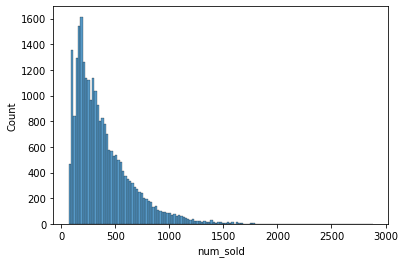

In [22]:
sns.histplot(data=train,x='num_sold')

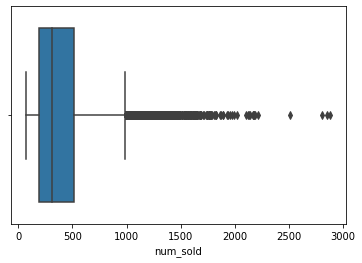

In [25]:
sns.boxplot(data=train,x='num_sold')

회귀를 이용해야할 것 같다. 

### year,month,day

In [18]:
train['year'].value_counts()

2016    6588
2015    6570
2018    6570
2017    6570
Name: year, dtype: int64

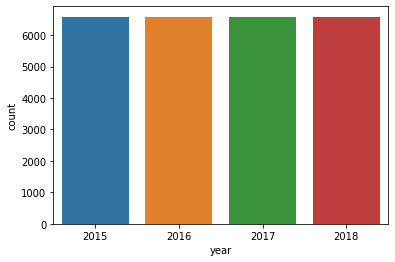

In [21]:
sns.countplot(data=train,x='year')

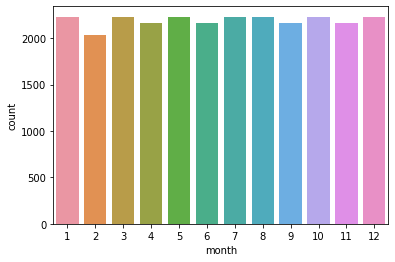

In [23]:
sns.countplot(data=train,x='month')

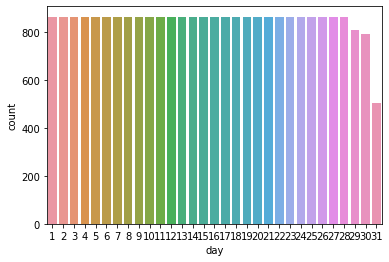

In [24]:
sns.countplot(data=train,x='day')

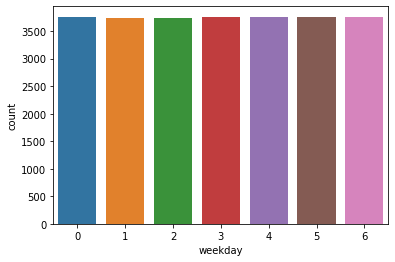

In [29]:
sns.countplot(data=train,x='weekday')

In [30]:
train['weekday'].value_counts()

6    3762
5    3762
4    3762
3    3762
0    3762
2    3744
1    3744
Name: weekday, dtype: int64

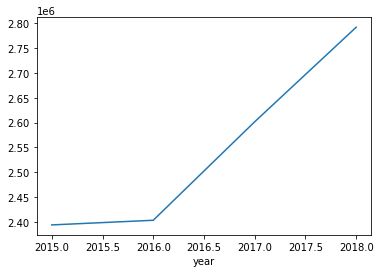

In [37]:
train.groupby('year').sum()['num_sold'].plot()

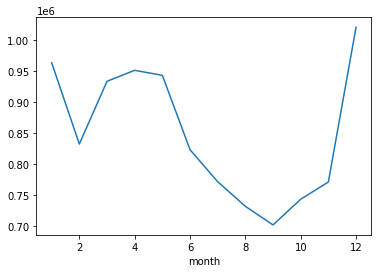

In [38]:
train.groupby('month').sum()['num_sold'].plot()

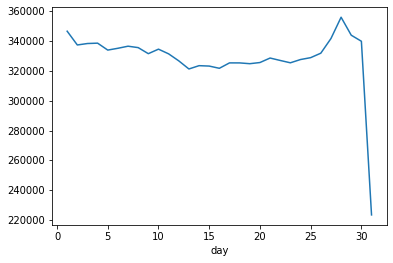

In [39]:
train.groupby('day').sum()['num_sold'].plot()

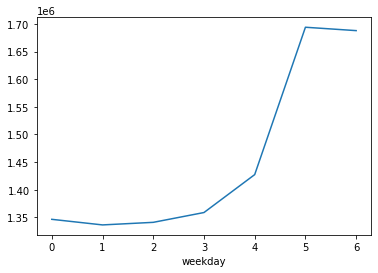

In [40]:
train.groupby('weekday').sum()['num_sold'].plot()

### country

In [26]:
train['country'].value_counts()

Norway     8766
Sweden     8766
Finland    8766
Name: country, dtype: int64

###  store


In [27]:
train['store'].value_counts()

KaggleRama    13149
KaggleMart    13149
Name: store, dtype: int64

### product

In [28]:
train['product'].value_counts()

Kaggle Sticker    8766
Kaggle Mug        8766
Kaggle Hat        8766
Name: product, dtype: int64

## 데이터 전처리

- 필요없는 값 삭제 ( id, date)
- 범주형 데이터는 원핫 인코딩으로 처리하는게 좋을 듯 


In [43]:
train=train.drop(['row_id','date'],axis=1)
test=test.drop(['row_id','date'],axis=1)

In [44]:
train.columns

Index(['country', 'store', 'product', 'num_sold', 'year', 'month', 'day',
       'weekday'],
      dtype='object')

In [45]:
test.columns

Index(['country', 'store', 'product', 'year', 'month', 'day', 'weekday'], dtype='object')

In [46]:
X_train=train.drop('num_sold',axis=1)
y_train=train['num_sold']
X_test=test

In [47]:
#범주형 컬럼
cat=['country', 'store', 'product']
num=['year', 'month', 'day','weekday']

In [59]:
cat_train=pd.get_dummies(train[cat])
cat_test=pd.get_dummies(test[cat])

In [61]:
X_train=pd.concat([train[num],cat_train],axis=1)
X_test=pd.concat([test[num],cat_test],axis=1)

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(26298, 12)
(26298,)
(6570, 12)


In [65]:
X_train

,year,month,day,weekday,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,2015,1,1,3,1,0,0,1,0,0,1,0
1,2015,1,1,3,1,0,0,1,0,1,0,0
2,2015,1,1,3,1,0,0,1,0,0,0,1
3,2015,1,1,3,1,0,0,0,1,0,1,0
4,2015,1,1,3,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26293,2018,12,31,0,0,0,1,1,0,1,0,0
26294,2018,12,31,0,0,0,1,1,0,0,0,1
26295,2018,12,31,0,0,0,1,0,1,0,1,0
26296,2018,12,31,0,0,0,1,0,1,1,0,0


## 모델링

- 랜덤포레스트 회귀
- XGBoost 회귀

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)



In [72]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[13:56:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
xgb_submit=sample.copy()
xgb_submit['num_sold']=xgb_pred
xgb_submit.to_csv('xgb.csv')

In [85]:
rf_submit=sample.copy()
rf_submit['num_sold']=rf_pred
rf_submit.to_csv('rf.csv')